In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug = pd.read_csv(mouse_drug_data_to_load)
clinical_trial = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
merge_table = pd.merge(mouse_drug, clinical_trial, on="Mouse ID")

# Display the data table for preview
merge_table.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint
drug_timepoint = merge_table.groupby(["Drug", "Timepoint"])
mean_tumor_value = drug_timepoint.mean()["Tumor Volume (mm3)"]

# Convert to DataFrame
tumor_mean = pd.DataFrame({"Tumor Volume (mm3)" : mean_tumor_value})

# Preview DataFrame
tumor_mean.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
standard_error = drug_timepoint.sem()["Tumor Volume (mm3)"]

# Convert to DataFrame
tumor_sem = pd.DataFrame({"Standard Error" : standard_error})

# Preview DataFrame
tumor_sem.head()

Standard Error
Drug      Timepoint                
Capomulin 0                0.000000
          5                0.448593
          10               0.702684
          15               0.838617
          20               0.909731

In [4]:
# Minor Data Munging to Re-Format the Data Frames
tumor_mean2 = tumor_mean.reset_index().pivot(index = 'Timepoint', columns = 'Drug', values = 'Tumor Volume (mm3)')
tumor_sem2 = tumor_sem.reset_index().pivot(index = 'Timepoint', columns = 'Drug', values = 'Standard Error')

# Preview that Reformatting worked
tumor_mean2

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


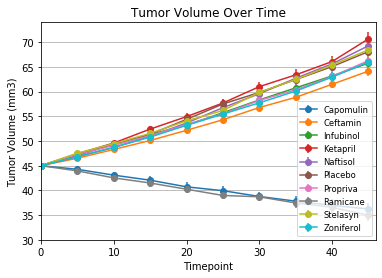

In [5]:
# Generate the Plot (with Error Bars)
#drugs = ["Capomulin","Ceftamin","Infubinol","Ketapril","Naftisol","Placebo","Propriva","Ramicane","Stelasyn","Zoniferol"]

plt.errorbar(tumor_mean2.index, tumor_mean2["Capomulin"], yerr=tumor_sem2["Capomulin"], color="C0", marker="o", markersize=6, label = "Capomulin")
plt.errorbar(tumor_mean2.index, tumor_mean2["Ceftamin"], yerr=tumor_sem2["Ceftamin"], color="C1", marker="o", markersize=6, label = "Ceftamin")
plt.errorbar(tumor_mean2.index, tumor_mean2["Infubinol"], yerr=tumor_sem2["Infubinol"], color="C2", marker="o", markersize=6, label = "Infubinol")
plt.errorbar(tumor_mean2.index, tumor_mean2["Ketapril"], yerr=tumor_sem2["Ketapril"], color="C3", marker="o", markersize=6, label = "Ketapril")
plt.errorbar(tumor_mean2.index, tumor_mean2["Naftisol"], yerr=tumor_sem2["Naftisol"], color="C4", marker="o", markersize=6, label = "Naftisol")
plt.errorbar(tumor_mean2.index, tumor_mean2["Placebo"], yerr=tumor_sem2["Placebo"], color="C5", marker="o", markersize=6, label = "Placebo")
plt.errorbar(tumor_mean2.index, tumor_mean2["Propriva"], yerr=tumor_sem2["Propriva"], color="C6", marker="o", markersize=6, label = "Propriva")
plt.errorbar(tumor_mean2.index, tumor_mean2["Ramicane"], yerr=tumor_sem2["Ramicane"], color="C7", marker="o", markersize=6, label = "Ramicane")
plt.errorbar(tumor_mean2.index, tumor_mean2["Stelasyn"], yerr=tumor_sem2["Stelasyn"], color="C8", marker="o", markersize=6, label = "Stelasyn")
plt.errorbar(tumor_mean2.index, tumor_mean2["Zoniferol"], yerr=tumor_sem2["Zoniferol"], color="C9", marker="o", markersize=6, label = "Zoniferol")

plt.title("Tumor Volume Over Time")
plt.legend(loc="best", fontsize="small", fancybox=True)
plt.grid(axis="y")

plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")

plt.xlim(0,46)
plt.ylim(30,74)

# Save the Figure
plt.savefig('Tumor Volume Over Time.png')
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [6]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
mean_met_site = drug_timepoint.mean()["Metastatic Sites"]

# Convert to DataFrame
mean_met_site_pd = pd.DataFrame({"Metastatic Sites" : mean_met_site})

# Preview DataFrame
mean_met_site_pd.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [7]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
sem_met_site = drug_timepoint.sem()["Metastatic Sites"]

# Convert to DataFrame
sem_met_site_pd = pd.DataFrame({"Standard Error" : sem_met_site})

# Preview DataFrame
sem_met_site_pd.head()

Standard Error
Drug      Timepoint                
Capomulin 0                0.000000
          5                0.074833
          10               0.125433
          15               0.132048
          20               0.161621

In [8]:
# Minor Data Munging to Re-Format the Data Frames
mean_met_site2 = mean_met_site_pd.reset_index().pivot(index = 'Timepoint', columns = 'Drug', values = 'Metastatic Sites')
sem_met_site2 = sem_met_site_pd.reset_index().pivot(index = 'Timepoint', columns = 'Drug', values = 'Standard Error')

# Preview that Reformatting worked
mean_met_site2.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


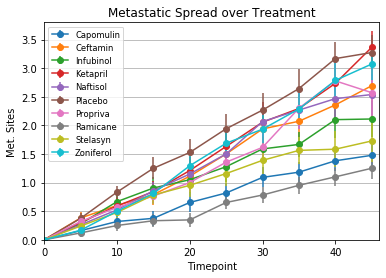

In [9]:
# Generate the Plot (with Error Bars)
#drugs = ["Capomulin","Ceftamin","Infubinol","Ketapril","Naftisol","Placebo","Propriva","Ramicane","Stelasyn","Zoniferol"]

plt.errorbar(mean_met_site2.index, mean_met_site2["Capomulin"], yerr=sem_met_site2["Capomulin"], color="C0", marker="o", markersize=6, label = "Capomulin")
plt.errorbar(mean_met_site2.index, mean_met_site2["Ceftamin"], yerr=sem_met_site2["Ceftamin"], color="C1", marker="o", markersize=6, label = "Ceftamin")
plt.errorbar(mean_met_site2.index, mean_met_site2["Infubinol"], yerr=sem_met_site2["Infubinol"], color="C2", marker="o", markersize=6, label = "Infubinol")
plt.errorbar(mean_met_site2.index, mean_met_site2["Ketapril"], yerr=sem_met_site2["Ketapril"], color="C3", marker="o", markersize=6, label = "Ketapril")
plt.errorbar(mean_met_site2.index, mean_met_site2["Naftisol"], yerr=sem_met_site2["Naftisol"], color="C4", marker="o", markersize=6, label = "Naftisol")
plt.errorbar(mean_met_site2.index, mean_met_site2["Placebo"], yerr=sem_met_site2["Placebo"], color="C5", marker="o", markersize=6, label = "Placebo")
plt.errorbar(mean_met_site2.index, mean_met_site2["Propriva"], yerr=sem_met_site2["Propriva"], color="C6", marker="o", markersize=6, label = "Propriva")
plt.errorbar(mean_met_site2.index, mean_met_site2["Ramicane"], yerr=sem_met_site2["Ramicane"], color="C7", marker="o", markersize=6, label = "Ramicane")
plt.errorbar(mean_met_site2.index, mean_met_site2["Stelasyn"], yerr=sem_met_site2["Stelasyn"], color="C8", marker="o", markersize=6, label = "Stelasyn")
plt.errorbar(mean_met_site2.index, mean_met_site2["Zoniferol"], yerr=sem_met_site2["Zoniferol"], color="C9", marker="o", markersize=6, label = "Zoniferol")

plt.title("Metastatic Spread over Treatment")
plt.legend(loc="best", fontsize="small", fancybox=True)
plt.grid(axis="y")

plt.xlabel("Timepoint")
plt.ylabel("Met. Sites")

plt.xlim(0,46)
plt.ylim(0,3.8)

# Save the Figure
plt.savefig('Metastatic Spread over Treatment.png')
plt.show()

![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [10]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice_count = drug_timepoint.nunique()["Mouse ID"]

# Convert to DataFrame
mice_count_pd = pd.DataFrame({"Mouse Count" : mice_count})

# Preview DataFrame
mice_count_pd.head()

Mouse Count
Drug      Timepoint             
Capomulin 0                   25
          5                   25
          10                  25
          15                  24
          20                  23

In [11]:
# Minor Data Munging to Re-Format the Data Frames
mice_count_pd2 = mice_count_pd.reset_index().pivot(index = 'Timepoint', columns = 'Drug', values = 'Mouse Count')
# Preview that Reformatting worked
mice_count_pd2.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,25,25,25,25
5,25,21,25,23,23,24,24,25,24,24
10,25,20,21,22,21,24,22,24,22,22
15,24,19,21,19,21,20,16,24,22,21
20,23,18,20,19,20,19,16,23,20,17


In [12]:
# Convert Percentages to DataFrame
mice_count_percent = pd.DataFrame({"Mouse Count" : mice_count/25*100})
mice_count_percent2 = mice_count_percent.reset_index().pivot(index = 'Timepoint', columns = 'Drug', values = 'Mouse Count')
# Preview that Reformatting worked
mice_count_percent2.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
5,100.0,84.0,100.0,92.0,92.0,96.0,96.0,100.0,96.0,96.0
10,100.0,80.0,84.0,88.0,84.0,96.0,88.0,96.0,88.0,88.0
15,96.0,76.0,84.0,76.0,84.0,80.0,64.0,96.0,88.0,84.0
20,92.0,72.0,80.0,76.0,80.0,76.0,64.0,92.0,80.0,68.0


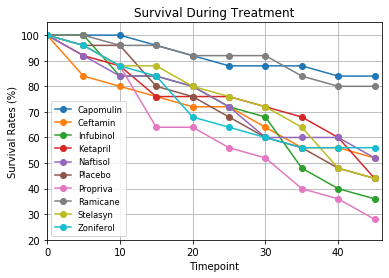

In [14]:
# Generate the Plot (with Error Bars)
#drugs = ["Capomulin","Ceftamin","Infubinol","Ketapril","Naftisol","Placebo","Propriva","Ramicane","Stelasyn","Zoniferol"]

plt.errorbar(mice_count_percent2.index, mice_count_percent2["Capomulin"], color="C0", marker="o", markersize=6, label = "Capomulin")
plt.errorbar(mice_count_percent2.index, mice_count_percent2["Ceftamin"], color="C1", marker="o", markersize=6, label = "Ceftamin")
plt.errorbar(mice_count_percent2.index, mice_count_percent2["Infubinol"], color="C2", marker="o", markersize=6, label = "Infubinol")
plt.errorbar(mice_count_percent2.index, mice_count_percent2["Ketapril"], color="C3", marker="o", markersize=6, label = "Ketapril")
plt.errorbar(mice_count_percent2.index, mice_count_percent2["Naftisol"], color="C4", marker="o", markersize=6, label = "Naftisol")
plt.errorbar(mice_count_percent2.index, mice_count_percent2["Placebo"], color="C5", marker="o", markersize=6, label = "Placebo")
plt.errorbar(mice_count_percent2.index, mice_count_percent2["Propriva"], color="C6", marker="o", markersize=6, label = "Propriva")
plt.errorbar(mice_count_percent2.index, mice_count_percent2["Ramicane"], color="C7", marker="o", markersize=6, label = "Ramicane")
plt.errorbar(mice_count_percent2.index, mice_count_percent2["Stelasyn"], color="C8", marker="o", markersize=6, label = "Stelasyn")
plt.errorbar(mice_count_percent2.index, mice_count_percent2["Zoniferol"], color="C9", marker="o", markersize=6, label = "Zoniferol")

plt.title("Survival During Treatment")
plt.legend(loc="best", fontsize="small", fancybox=True)
plt.grid(axis="both")

plt.xlabel("Timepoint")
plt.ylabel("Survival Rates (%)")

plt.xlim(0,46)
plt.ylim(20,105)

# Save the Figure
plt.savefig('Survival During Treatment.png')
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [ ]:
# Calculate the percent changes for each drug using tumor volume over time
percentchange = 
# Your bar graph should indicate tumor growth as red and tumor reduction as green.
# It should also include a label with the percentage change for each bar. 

# Display the data to confirm


In [ ]:
#drugs = ["Capomulin","Ceftamin","Infubinol","Ketapril","Naftisol","Placebo","Propriva","Ramicane","Stelasyn","Zoniferol"]


percentchange = 

In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

![Metastatic Spread During Treatment](../Images/change.png)